## **Spaceship-titanic-Extensive-EDA**

Predict which passengers are transported to an alternate dimension

### **📌 Mounting Google Drive in Google Colab**  


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing the Libraries**

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<a id="3"></a>
# **<center><span style="color:#00BFC4;">Data Loading and Preparation </span></center>**

In [76]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Spaceship-titanic.csv")


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Data:</u></b><br>

* <i> There are total of <b><u>14</u></b> columns and <b><u>8693</u></b> rows in <b><u>train</u></b> data.</i><br>
* <i> Train data contains <b><u>119378</u></b> observation with <b><u>2324</u></b>  missing values.</i><br>
* <i> <b><u>Transported</u></b> is the target variable which is available in dataset.</i><br>
</div>

Below are the first 5 rows of train dataset:

In [77]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [78]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [79]:
df.shape


(8693, 14)

In [80]:
print(f'Number of rows in data: {df.shape[0]}')
print(f'Number of columns in data: {df.shape[1]}')

Number of rows in data: 8693
Number of columns in data: 14


In [81]:
df.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [82]:
df.dtypes

,0
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


In [83]:
print(f'Number of values in data: {df.count().sum()}')
print(f'Number missing values in data: {sum(df.isna().sum())}')

Number of values in data: 119378
Number missing values in data: 2324


### <span style="color:#e76f51;"> Column Wise missing values : </span>

In [84]:
df.isna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# **Checking missing values column wise (Sum of values)**

In [85]:
print(df.isna().sum().sort_values(ascending = False))

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


# **Heatmap for missing values**

<Axes: >

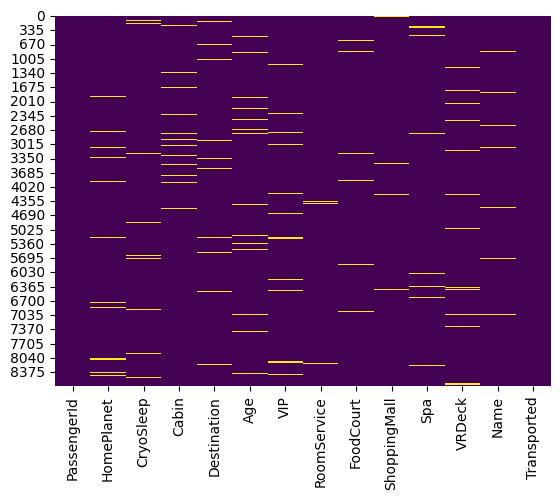

In [86]:
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)

# **Percentage of Missing Values.**

In [87]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False))


CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
Spa             2.105142
FoodCourt       2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
PassengerId     0.000000
Transported     0.000000
dtype: float64


In [88]:
df.loc[df.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


# **Basic statistics of data**

In [89]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<a id="4"></a>
# **<center><span style="color:#00BFC4;"> EDA </span></center>**

<a id="4.1"></a>
## <span style="color:#e76f51;"> Overview of Data </span>

In [91]:
df.drop(["PassengerId"], axis=1, inplace=True)

In [92]:
TARGET = 'Transported'
FEATURES = [col for col in df.columns if col != TARGET]
RANDOM_STATE = 12

# ****Statistical Summary of Features Sorted by Standard Deviation****

In [93]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


<a id="4.7"></a>
## <span style="color:#e76f51;"> Null Value Distribution  </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>

* <i> The maximum of missing value in an row is <b><u>3</u></b> and the lowest is <b><u>no missing value</u></b></i><br>
* <i> There are around <b><u>76%</u></b> of the observations (row basis) that has no missing values.  </i><br>
</div>

<a id="4.2.1"></a>
### <span style="color:#e76f51;">Column wise Null Value Distribution   </span>

In [94]:
# Calculate missing values
train_null = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
train_null = train_null.sort_values(by="Missing Values", ascending=False)

# Create Figure
fig = go.Figure()

# Add Bar chart
fig.add_trace(go.Bar(
    x=train_null["Missing Values"],
    y=train_null.index,
    orientation="h",
    marker=dict(
        color=[n for n in range(len(train_null))],  # Color variation
        line_color='rgb(0,0,0)',
        line_width=2
    )
))

# Update layout
fig.update_layout(
    title_text="Column-wise Null Value Distribution",
    title_x=0.5,
    showlegend=False,
    xaxis_title="Missing Values",
    yaxis_title="Columns"
)

# Show plot
fig.show()


# **Row wise Null Value Distribution**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>

* <i> Out of <b><u>12</u></b> features <b><u>6</u></b> features are continous, <b><u>2</u></b> features are text data and <b><u>4</u></b> features are categorical.</i><br>
* <i><b><u>HomePlanet</u></b> and <b><u>Destination</u></b> have <b><u>3</u></b> differnt unique values. </i><br>
* <i><b><u>CryoSleep</u></b> and <b><u>VIP</u></b> are <b><u>bool</u></b> features </i><br>
</div>

In [95]:

text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

print(f'Total number of features: {len(FEATURES)}')
print(f'Number of categorical features: {len(cat_features)}')
print(f'Number of continuos features: {len(cont_features)}')
print(f'Number of text features: {len(text_features)}')

labels=['Categorical', 'Continuos', "Text"]
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors,
                line=dict(color='#000000',
                          width=2))
)])
fig.show()

Total number of features: 12
Number of categorical features: 4
Number of continuos features: 6
Number of text features: 2


<a id="4.3"></a>
## <span style="color:#e76f51;"> Feature Distribution of Continous Features </span>


### <span style="color:#e76f51;">  Distribution of Age </span>

In [96]:
train_age = df.copy()
train_age["type"] = "Train"
ageDf = train_age
fig = px.histogram(data_frame = ageDf,
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

# **Feature Distribution of Categorical Features**

<ipython-input-97-5aff23ac3adf>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-5aff23ac3adf>:12: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

<ipython-input-97-5aff23ac3adf>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-5aff23ac3adf>:12: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

<ipython-input-97-5aff23ac3adf>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

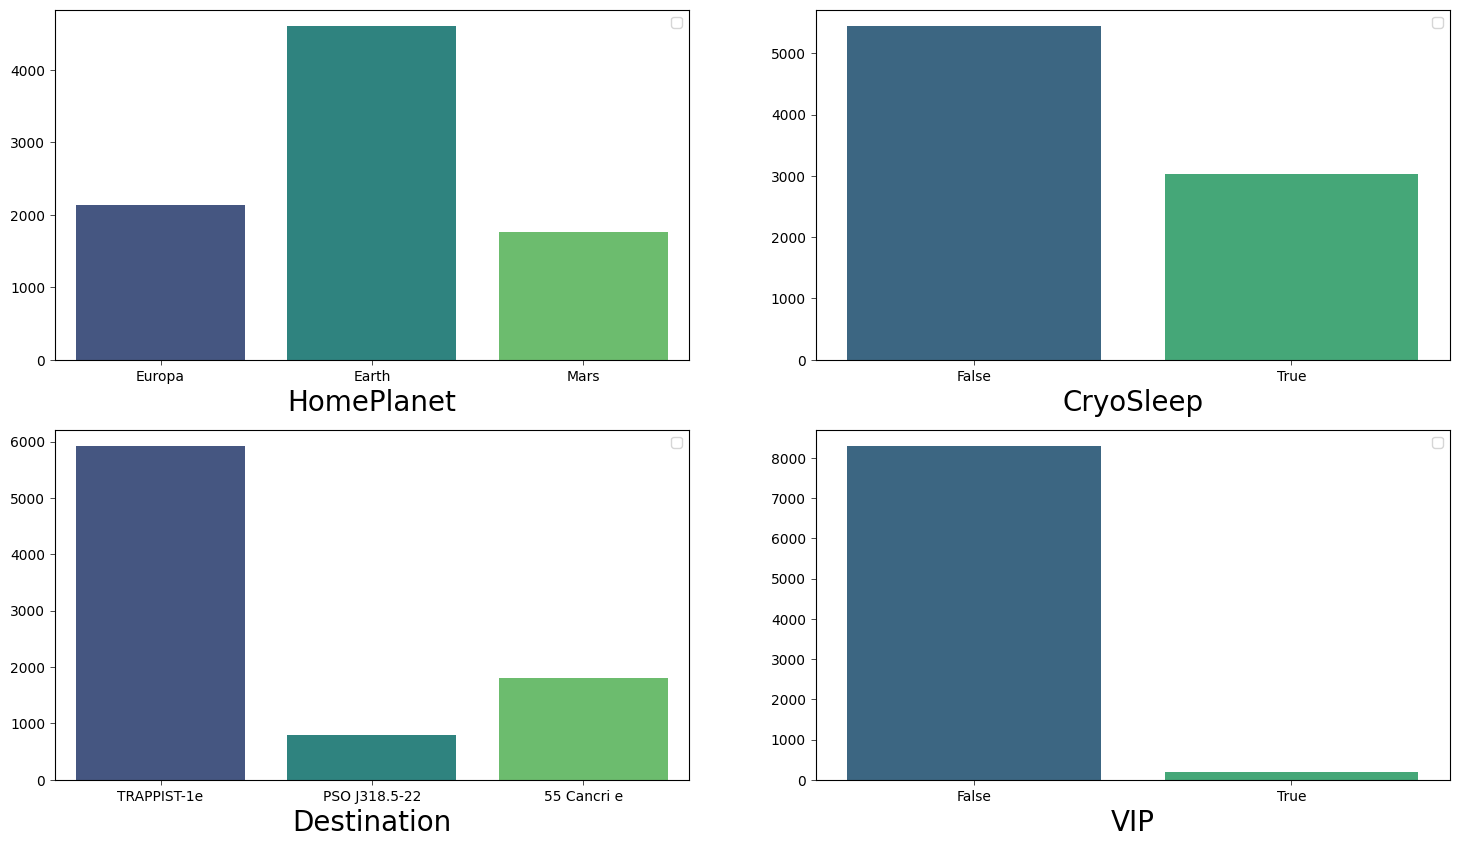

In [97]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.countplot(x=df[col], ax=axes[r, c], palette="viridis", legend=False)
            axes[r,c].legend()
            axes[r,c].set_ylabel('')
            axes[r,c].set_xlabel(col, fontsize=20)
            axes[r,c].tick_params(labelsize=10, width=0.5)
            axes[r,c].xaxis.offsetText.set_fontsize(4)
            axes[r,c].yaxis.offsetText.set_fontsize(4)
    plt.show()

# **Detecting Outliers**

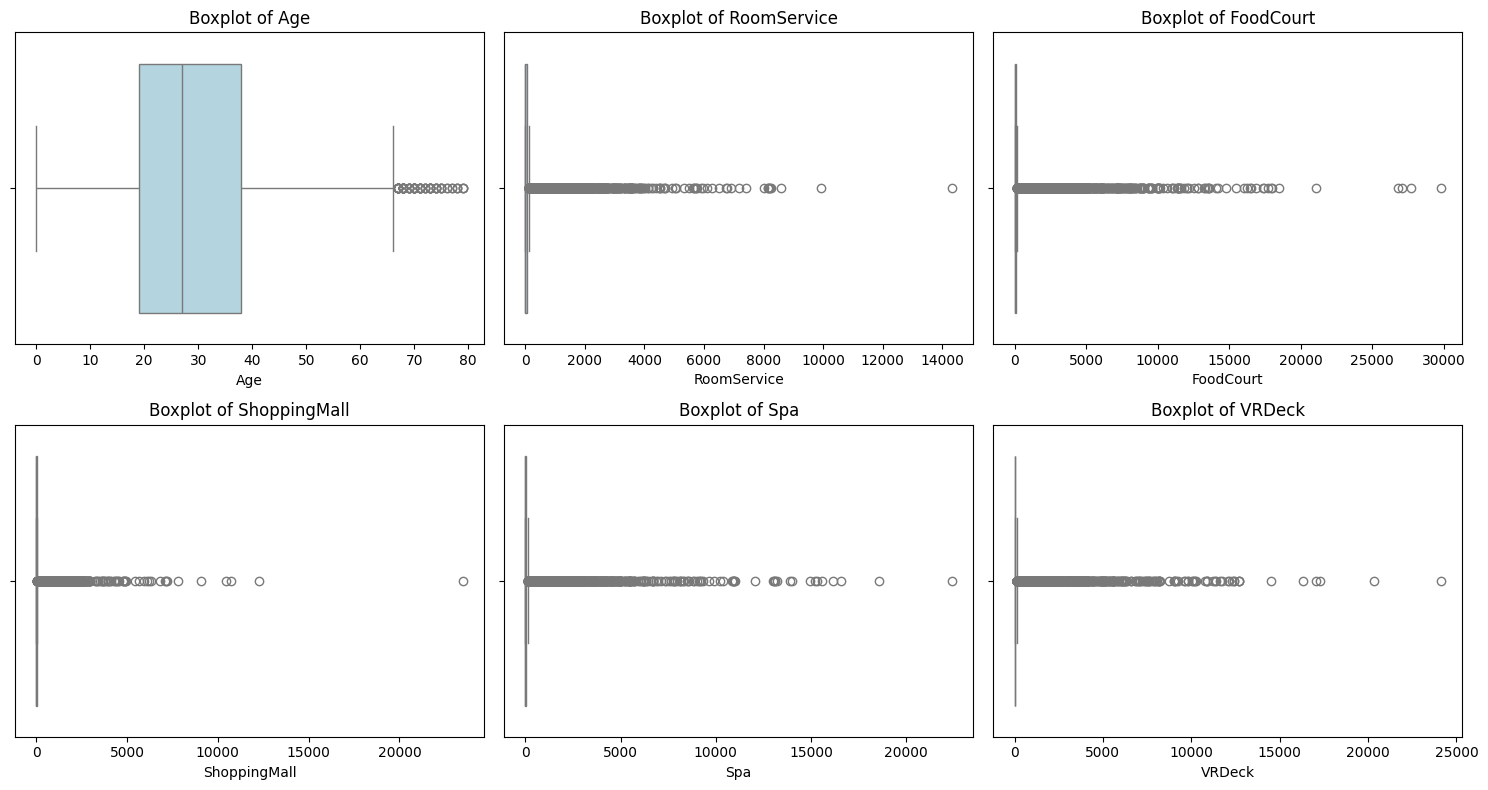

In [98]:
# Select numerical features only
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)  # Adjust grid size based on feature count
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# **Target Distribution**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>

* <i>There are two target values - <b><u>0</u></b> and <b><u>1</u></b>.</i><br>
* <i>Both the target values are almost equally distributed. </i><br>
</div>

Percentage of Transported = 0: 50.36 %
Percentage of Transported = 1: 49.64 %


<ipython-input-99-44f0baad5ca8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Transported', ylabel='count'>

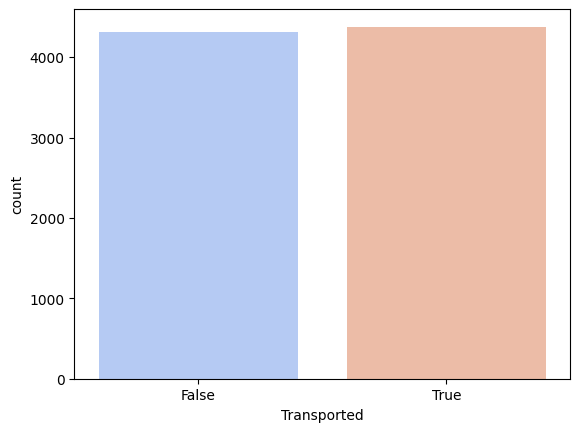

In [99]:
print("Percentage of Transported = 0: {:.2f} %".format(target_df["count"][0] *100 / df.shape[0]))
print("Percentage of Transported = 1: {:.2f} %".format(target_df["count"][1]* 100 / df.shape[0]))

sns.countplot(x=TARGET, data=df, palette="coolwarm")

# **Encoding Categorical Features**

In [100]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

print("Categorical features encoded successfully!")

Categorical features encoded successfully!


# **Correlation matrix**

In [101]:
import plotly.express as px

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Create correlation matrix plot
fig = px.imshow(numeric_df.corr(), text_auto=True, aspect="auto", color_continuous_scale="viridis")
fig.show()

# **Feature Relationships**

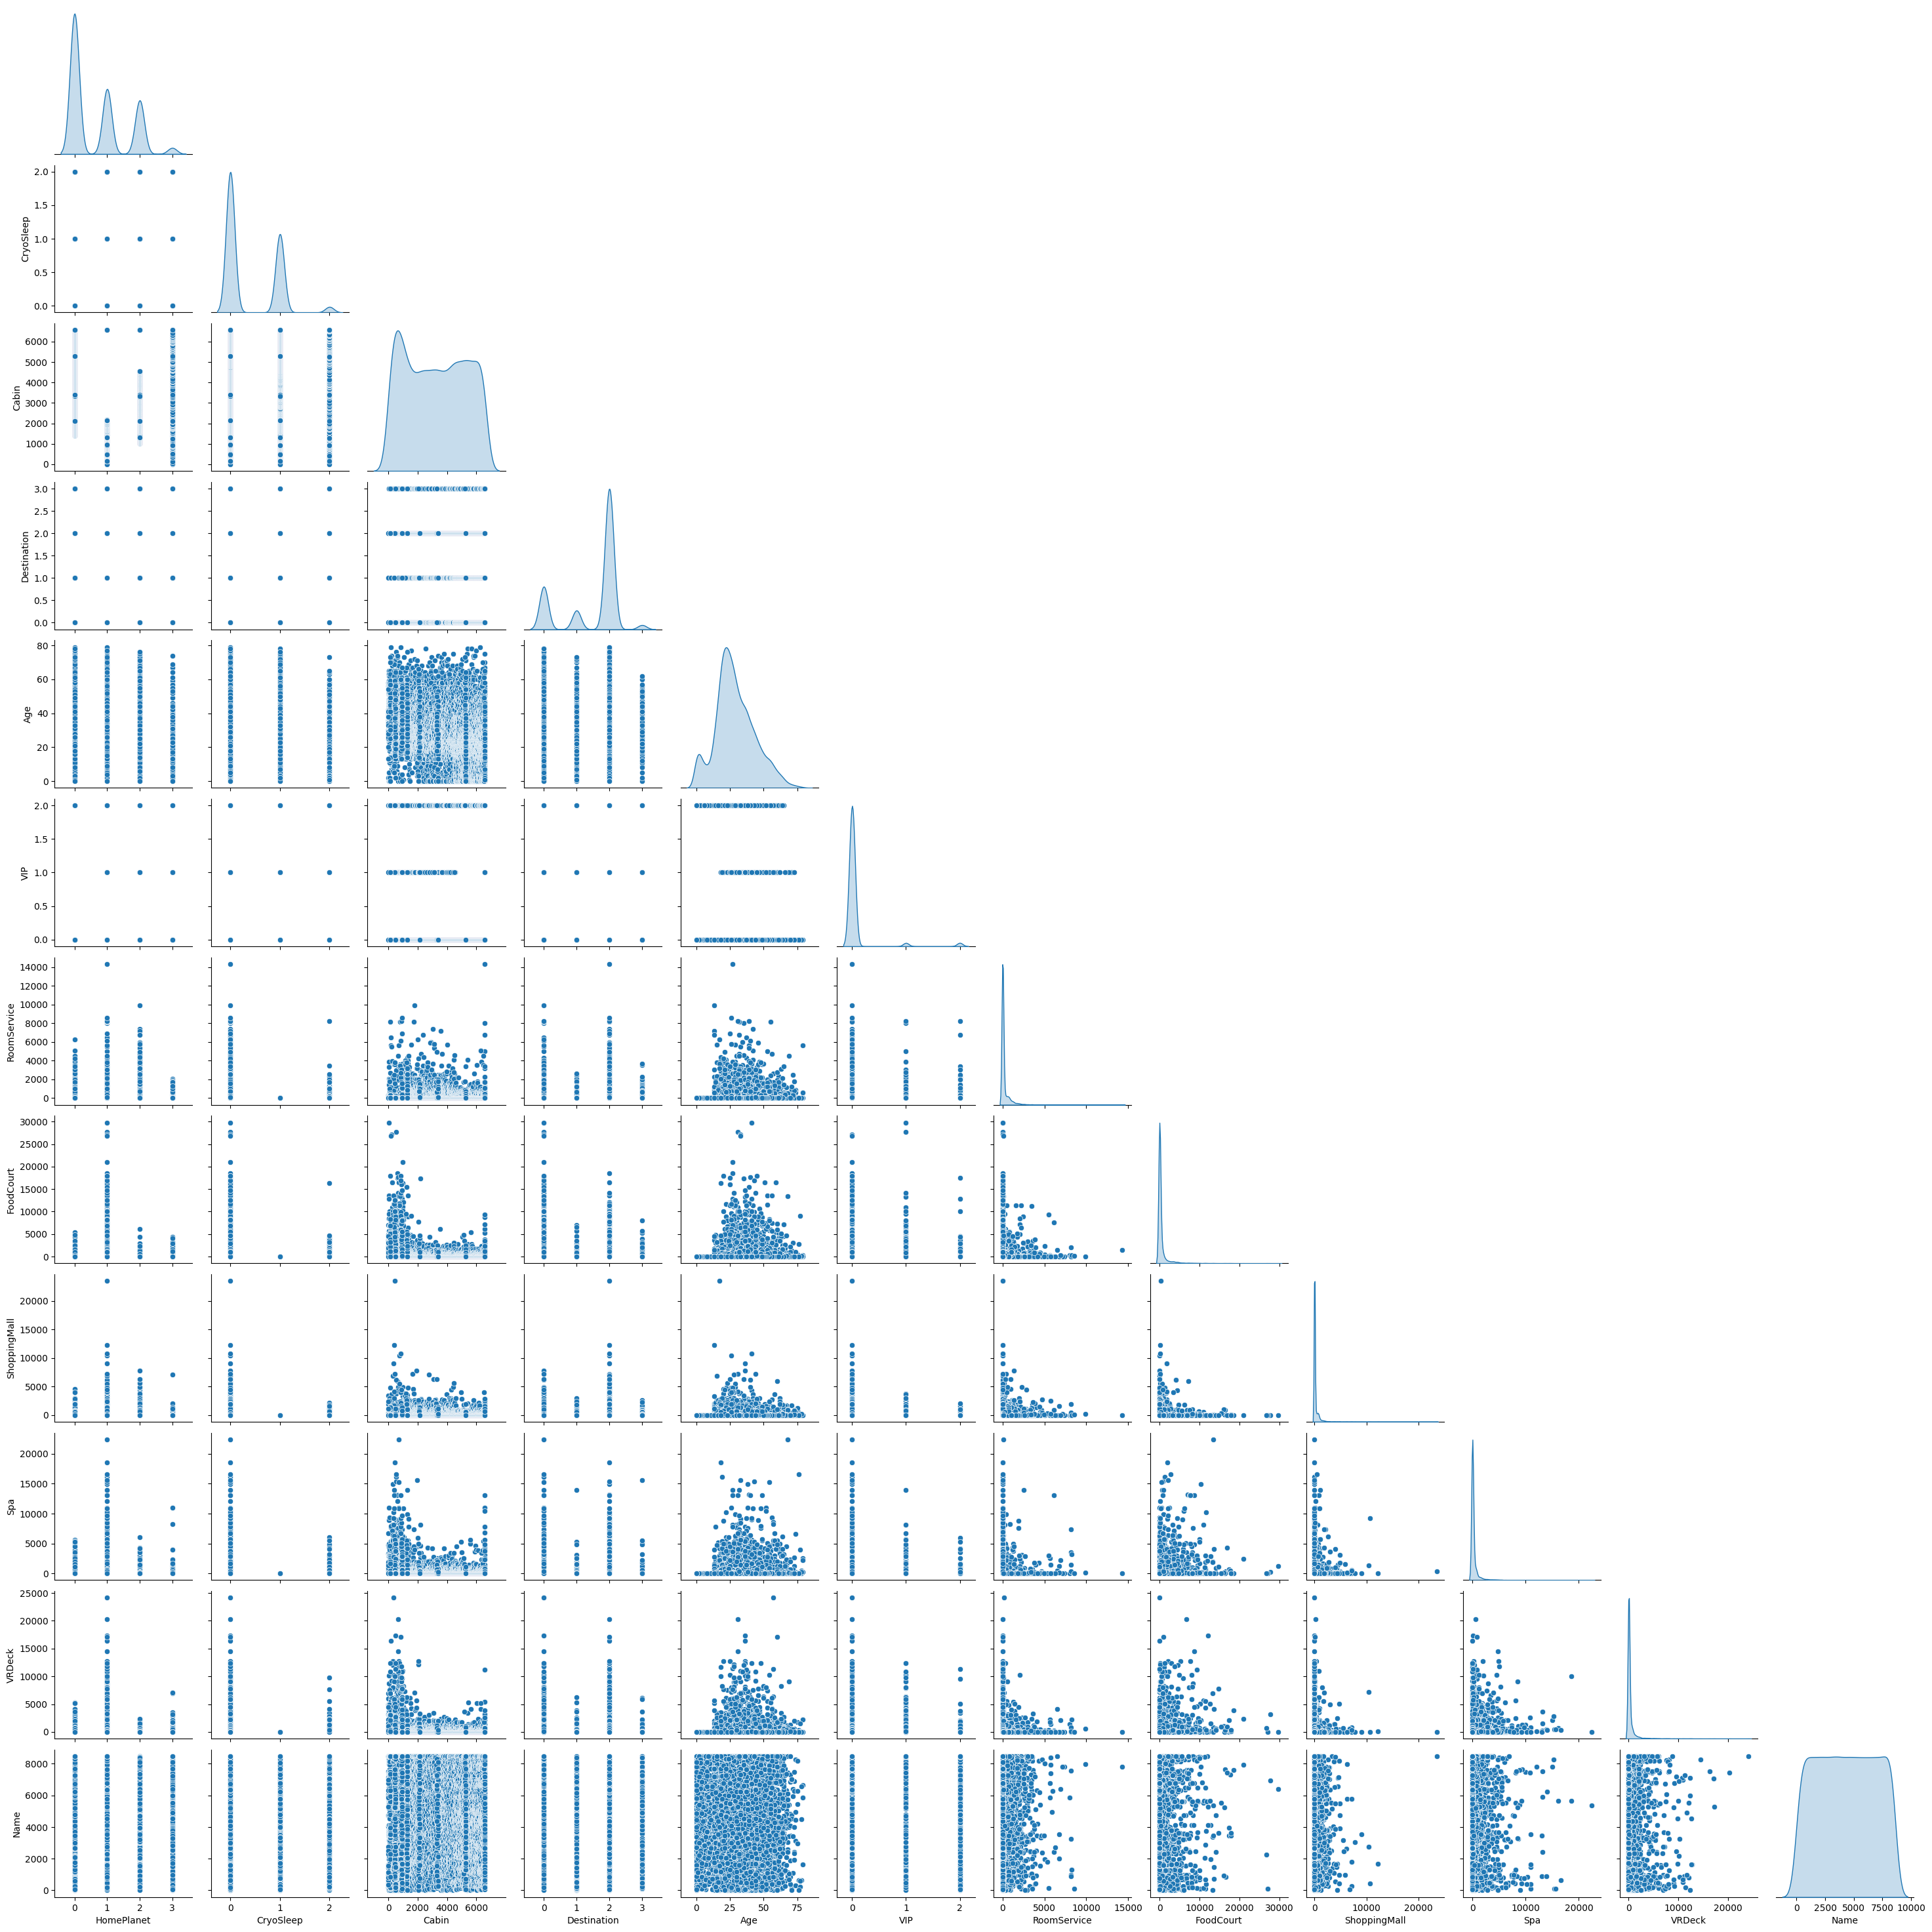

In [102]:
# Selecting numerical columns only
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create a pairplot
sns.pairplot(df[num_features], diag_kind="kde", corner=True)
plt.show()
